In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
#displaying data
inspector = inspect(engine)
#inspector.get_table_names()

In [10]:
#displaying data
#inspector.get_columns('measurement')
#inspector.get_columns('station')

In [11]:
# Find the most recent date in the data set.
mostrecentdate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#mostrecentdate
print(f'The most recent date in the data set is {mostrecentdate[0]}')

The most recent date in the data set is 2017-08-23


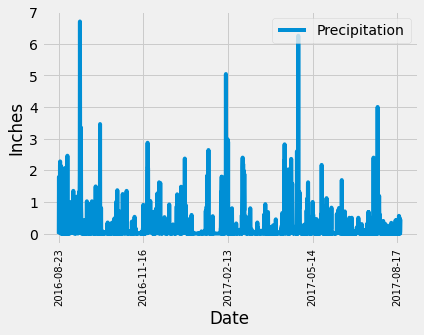

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
filter(Measurement.date <= "2017-08-23").all()
#precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation)
df = df.rename(columns = {0:'Date', 1:'Precipitation'})
df = df.set_index('Date')
# Sort the dataframe by date
df = df.sort_values(by = 'Date').dropna()
#df.head()

# Use Pandas Plotting with Matplotlib to plot the data
fig = df.plot()
plt.ylabel("Inches")
plt.legend(loc = 'upper right')
plt.xticks(rotation = 'vertical', fontsize = 10)
fig.locator_params(axis="x", nbins=9)


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
count = session.query(Station.id).count()
print(f'{count} stations')

9 stations


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
mostactive = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
mostactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min = session.query(func.min(Measurement.tobs).filter(Measurement.station == 'USC00519281'))
#min[0]
max = session.query(func.max(Measurement.tobs).filter(Measurement.station == 'USC00519281'))
avg = session.query(func.avg(Measurement.tobs).filter(Measurement.station == 'USC00519281'))
print(f'For USC00519281,the lowest temperature recorded is {min[0][0]}, the highest temperature recorded is {max[0][0]}, and the average temperature is {round(avg[0][0], 1)}.')

For USC00519281,the lowest temperature recorded is 54.0, the highest temperature recorded is 85.0, and the average temperature is 71.7.


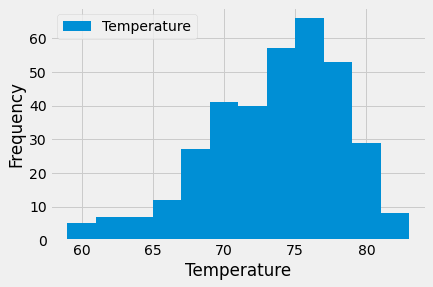

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationdata = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= "2016-08-23").\
                filter(Measurement.date <= "2017-08-23").filter(Measurement.station == "USC00519281").all()
station_df = pd.DataFrame(stationdata)
station_df = station_df.rename(columns = {0:'Date', 1:'Temperature'})
station_df.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.legend(loc = 'upper left')

# Close session

In [18]:
# Close Session
session.close()